In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Chaos
## Modeling Life, chapter 5, class 1
IBM3101 - Francisco Sahli

**Continuos Chaos**: food chain model

Plants:
$$X' = X\left(1 - X\right) - \frac{a_1X}{1+b_1X}Y$$
Herbivores:
$$Y' = \frac{a_1X}{1+b_1X}Y - d_1Y - \frac{a_2Y}{1+b_2Y}Z$$
Carnivores:
$$Z' = \frac{a_2Y}{1+b_2Y}Z - d_2Z$$

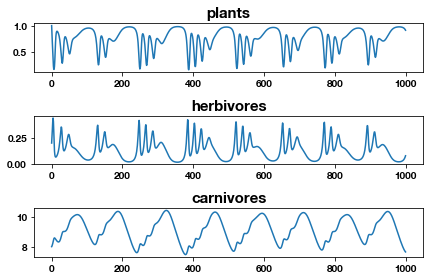

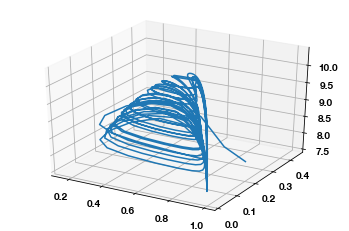

In [11]:
def PHC(y, t, a1, b1, a2, b2, d1, d2):
    X, Y, Z = y
    Xp = X*(1-X) - a1*X/(1 + b1*X)*Y
    Yp = a1*X/(1 + b1*X)*Y - d1*Y - a2*Y/(1 + b2*Y)*Z
    Zp = a2*Y/(1 + b2*Y)*Z - d2*Z
    
    return [Xp, Yp, Zp]

a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

time = np.linspace(0,1000,1000)
Y0 = [1,0.2,8]

Y = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))

plt.subplot(311)
plt.title('plants')
plt.plot(time, Y[:,0], label = 'plants')
plt.subplot(312)
plt.title('herbivores')
plt.plot(time, Y[:,1], label = 'herbivores')
plt.subplot(313)
plt.title('carnivores')
plt.plot(time, Y[:,2], label = 'carnivores')
plt.tight_layout()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Y[:,0], Y[:,1], Y[:,2])


Run the model with different initial conditions and comment on what is happening

**Discrete chaos**: the discrete-time logistic model
$$X_{N+1} = rX_N(1 - X_N)$$

Text(0, 0.5, '$X_N$')

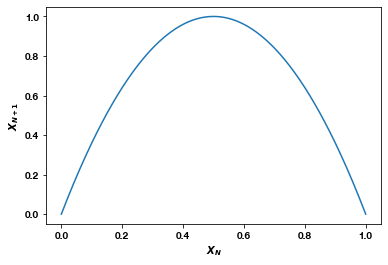

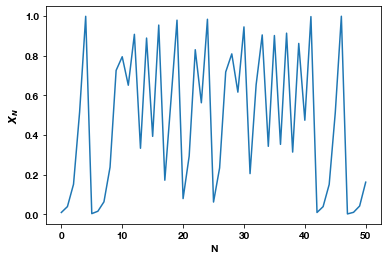

In [34]:
Xn = np.linspace(0, 1, 300)
r = 4
Xnp1 = r*Xn*(1 - Xn)

plt.plot(Xn, Xnp1)
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$')


plt.figure()
N = 50

X = [0.01]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
plt.plot(X)
plt.xlabel('N')
plt.ylabel('$X_N$')

Cobwebbing:
$$X_{N+1} = f(X_N)$$

<img src="Ch5Images/iteration.png" alt="drawing" width="150"/>

Text(0, 0.5, '$X_N$')

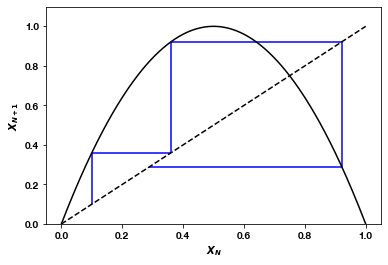

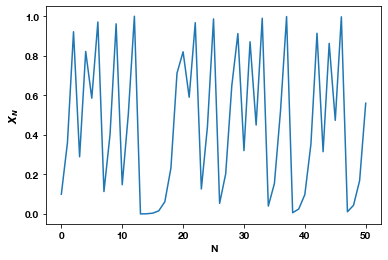

In [66]:
r = 4

if r < 0:
    Xn = np.linspace(-0.5, 1.5, 300)
else:
    Xn = np.linspace(0, 1.0, 300)
Xnp1 = r*Xn*(1 - Xn)

plt.plot(Xn, Xnp1,'k')
plt.plot(Xn,Xn,'k--')

N = 50

X = [0.1]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
N_plot = 3

for i in range(N_plot):
    plt.vlines(X[i],X[i],X[i+1],'b')
    plt.hlines(X[i+1],X[i],X[i+1],'b')
    
plt.ylim([Xnp1.min()*1.1,Xnp1.max()*1.1])
plt.xlabel('$X_N$')
plt.ylabel('$X_{N+1}$')   

plt.figure()

plt.plot(X)
plt.xlabel('N')
plt.ylabel('$X_N$')

- change the number of steps plotted `N_plot`
- change `r` in the following ranges:
    1. 0 < r < 1
    2. r > 1
    3. -1 < r < 0
    4. r < -1

## 5.2 Characteristics of Chaos

**Determinism**: Given some initial conditions and parameters, the model behavior will always be same.

**Boundness**: the system does not goes to infinity

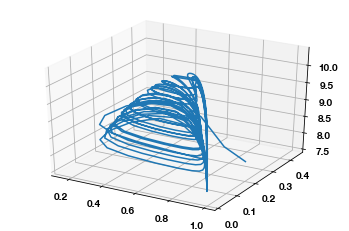

In [67]:
a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

time = np.linspace(0,1000,1000)
Y0 = [1,0.2,8]

Y = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Y[:,0], Y[:,1], Y[:,2])


**Irregularity**: the system never passes through the same point in the state space twice.

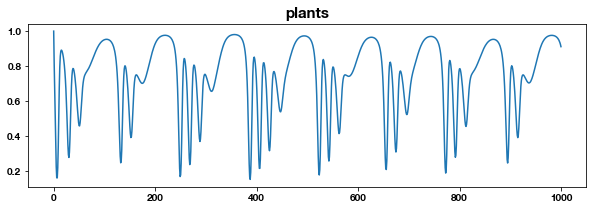

In [69]:
fig = plt.figure()
fig.set_size_inches((10,3))
plt.title('plants')
plt.plot(time, Y[:,0], label = 'plants')

Text(0, 0.5, '$X_N$')

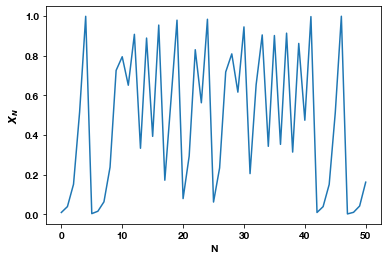

In [70]:
r = 4

plt.figure()
N = 50

X = [0.01]
for i in range(N):
    X.append(r*X[-1]*(1 - X[-1]))
    
plt.plot(X)
plt.xlabel('N')
plt.ylabel('$X_N$')

In this simulation, the last eight points looks like the same as the las first eight. 
- Check if they are actually the same.
- Run the simulation for `N = 100` to see if the behavior repeats

**Sensitive dependence on initial conditions**

The butterfly effect: "does the flap of a butterfly’s wings in Brazil set off a tornado in Texas?" (Edward Lorenz, 1972)

Text(0.5, 0, 'time')

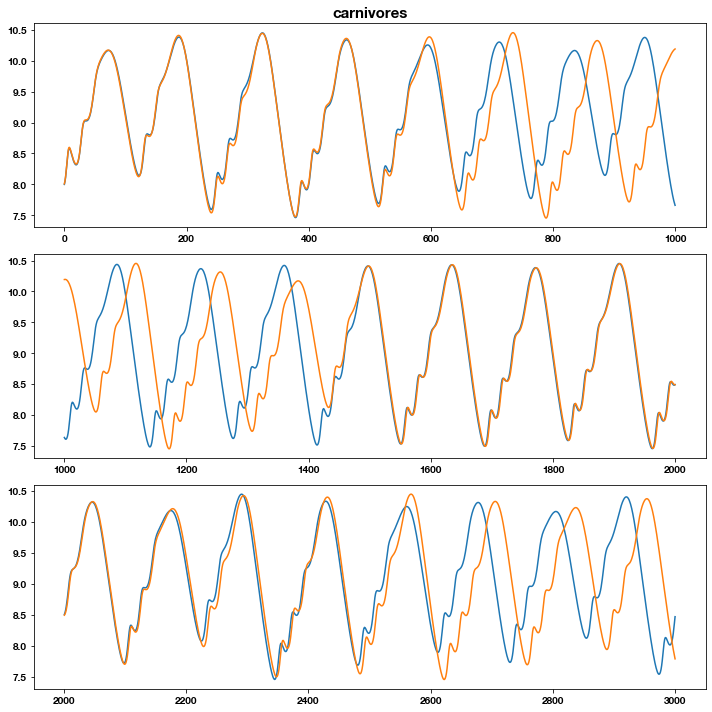

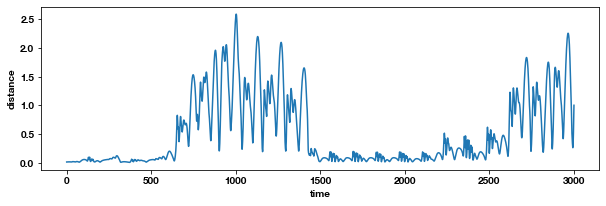

In [77]:
a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

time = np.linspace(0,3000,3000)
Y0 = [1,0.2,8]

Y1 = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))

Y0 = [1,0.2,8.01]

Y2 = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))

fig = plt.figure()
fig.set_size_inches((10,10))

plt.subplot(311)
plt.title('carnivores')
plt.plot(time[:1000], Y1[:1000,2], label = 'carnivores')
plt.plot(time[:1000], Y2[:1000,2], label = 'carnivores')

plt.subplot(312)
plt.plot(time[1000:2000], Y1[1000:2000,2], label = 'carnivores')
plt.plot(time[1000:2000], Y2[1000:2000,2], label = 'carnivores')

plt.subplot(313)
plt.plot(time[2000:3000], Y1[2000:3000,2], label = 'carnivores')
plt.plot(time[2000:3000], Y2[2000:3000,2], label = 'carnivores')
plt.tight_layout()

fig = plt.figure()
fig.set_size_inches((10,3))

dist = np.linalg.norm((Y1 - Y2), axis = 1)
plt.plot(time, dist)

plt.ylabel('distance')
plt.xlabel('time')



**Unpredictability**: due to the sensitivity to initial conditions.



X1 X2
[[0.01000214 0.01      ]
 [0.03960837 0.0396    ]
 [0.1521582  0.15212736]
 [0.51602434 0.51593851]
 [0.99897288 0.99898386]
 [0.00410425 0.00406045]
 [0.01634962 0.01617583]
 [0.06432924 0.0636567 ]
 [0.24076396 0.23841808]
 [0.7311867  0.7262996 ]
 [0.78621084 0.79515396]
 [0.67233342 0.65153655]
 [0.88120476 0.90814669]
 [0.41873171 0.33366511]
 [0.97358186 0.88933082]
 [0.10288088 0.39368605]
 [0.36918561 0.95478938]
 [0.93155038 0.17266648]
 [0.25505706 0.57141108]
 [0.76001183 0.97960183]]


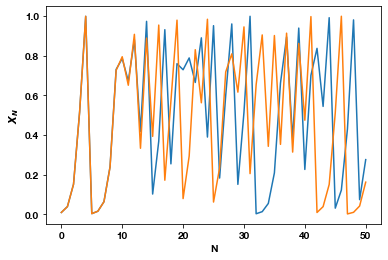

In [99]:
r = 4

plt.figure()
N = 50

X1 = np.array([0.01]).astype(np.float16)
X2 = np.array([0.01]).astype(np.float64)

for i in range(N):
    X1 = np.append(X1,r*X1[-1]*(1 - X1[-1]))
    X2 = np.append(X2,r*X2[-1]*(1 - X2[-1]))
    
plt.plot(X1)
plt.plot(X2)
plt.xlabel('N')
plt.ylabel('$X_N$')

print('X1', 'X2')

print(np.vstack((X1[:20],X2[:20])).T)


- is the float64 precise enough? Compare it `np.float128` for `N = 100`

**Chaotic attractors**

| Behavior | Mathematical model |
| :---------| :------------------ |
| equilibrium | stable equilibrium|
| oscillation | limit cycle attractor |
| chaos | chaotic attractor |

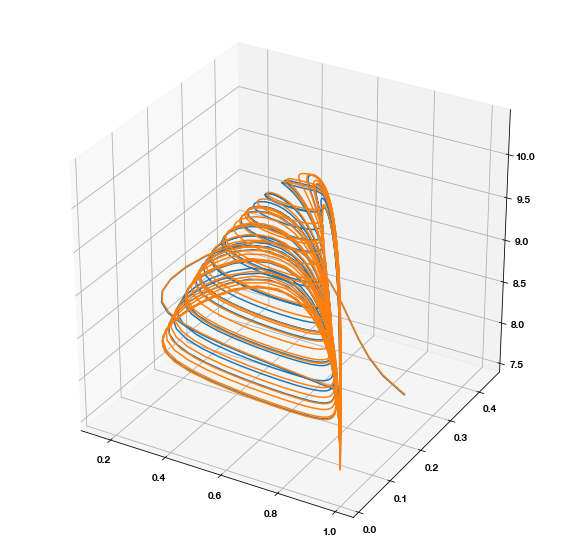

In [102]:
a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

time = np.linspace(0,1000,2000)
Y0 = [1,0.2,8]

Y1 = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))

Y0 = [1,0.2,8.01]

Y2 = odeint(PHC, Y0, time, args = (a1, b1, a2, b2, d1, d2))


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches((10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Y1[:,0], Y1[:,1], Y1[:,2])
ax.plot(Y2[:,0], Y2[:,1], Y2[:,2])
